# Assignment 1
## Q1 East west airlines

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [3]:
df = pd.read_excel("EastWestAirlines.xlsx")

In [10]:
cols = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans','Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']

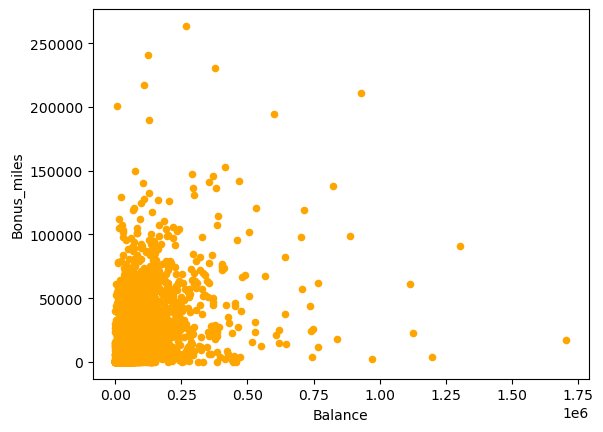

In [53]:
#scatter plot
plt.scatter(df['Balance'], df['Bonus_miles'],s=20,color='orange')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.show()

In [11]:
#data is not scaled, so we need to scale it
scaler=MinMaxScaler()
df_scaled = scaler.fit_transform(df[cols])

In [12]:
#convert back to dataframe
df_scaled = pd.DataFrame(df_scaled, columns=cols)

In [13]:
#k-means clustering
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df_scaled)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
df['cluster'] = y_predicted

In [15]:
#display first few rows
print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   cluster  
0        2  
1        2  
2        2 

In [16]:
#clustercenters
print("Cluster Centers (scaled):")
print(km.cluster_centers_)

Cluster Centers (scaled):
[[0.04244416 0.01330506 0.06625212 0.13722534 0.01467047 0.02461939
  0.51305231]
 [0.02663117 0.01088948 0.03969223 0.11051116 0.01321942 0.02215521
  0.22134505]
 [0.06388815 0.01489551 0.0938083  0.16121692 0.01729797 0.03204294
  0.80469721]]


In [17]:
# Inverse transform the cluster centers back to the original scale
centroids_original = scaler.inverse_transform(km.cluster_centers_)
print("Cluster Centers (original scale):")
print(centroids_original)

Cluster Centers (original scale):
[[7.23604166e+04 1.48324828e+02 1.74696890e+04 1.18013793e+01
  4.52100000e+02 1.30482759e+00 4.25725586e+03]
 [4.54018243e+04 1.21395968e+02 1.04662448e+04 9.50395968e+00
  4.07383009e+02 1.17422606e+00 1.83783585e+03]
 [1.08918941e+05 1.66055172e+02 2.47358422e+04 1.38646552e+01
  5.33071552e+02 1.69827586e+00 6.67615862e+03]]


In [18]:
#dataframes for the clusters
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

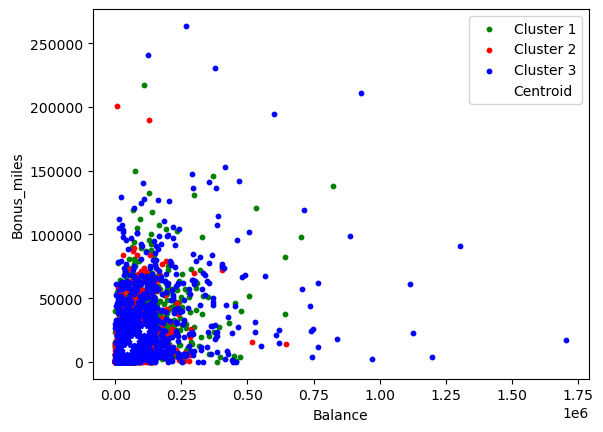

In [42]:
#plot them
#balance and bonus miles
plt.scatter(df1['Balance'], df1['Bonus_miles'], color='green', label='Cluster 1', s=10)
plt.scatter(df2['Balance'], df2['Bonus_miles'], color='red', label='Cluster 2',s=10)
plt.scatter(df3['Balance'], df3['Bonus_miles'], color='blue', label='Cluster 3',s=10)
plt.scatter(centroids_original[:, 0], centroids_original[:, 2], color='white', marker='*', s=20, label='Centroid')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.legend()
plt.show()

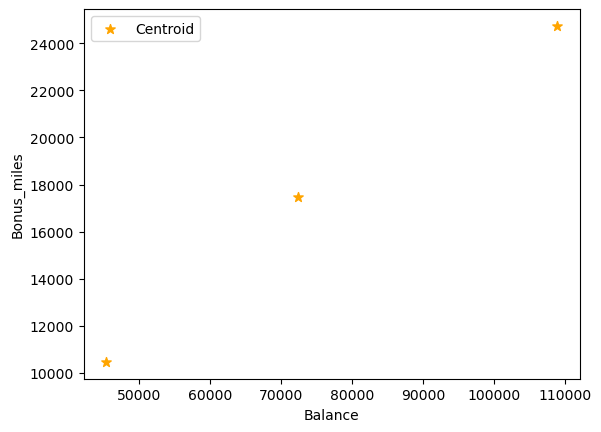

In [50]:
#show cluster centers
plt.scatter(centroids_original[:, 0], centroids_original[:, 2], color='orange', marker='*', s=50, label='Centroid')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.legend()
plt.show()

## Elbow curve

In [23]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [24]:
df = pd.read_excel("EastWestAirlines.xlsx")

In [25]:
cols=['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans','Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']

In [27]:
def normalization(column):
    return (column - column.min()) / (column.max() - column.min())

In [30]:
df_norm = normalization(df[cols])

In [48]:
#find number of clusters
TWSS=[]
k = list(range(2, 8))
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_k

C:\Users\ACER\AppData\Local\Temp\ipykernel_54908\1625205585.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(k, TWSS, 'ro-',color='blue')


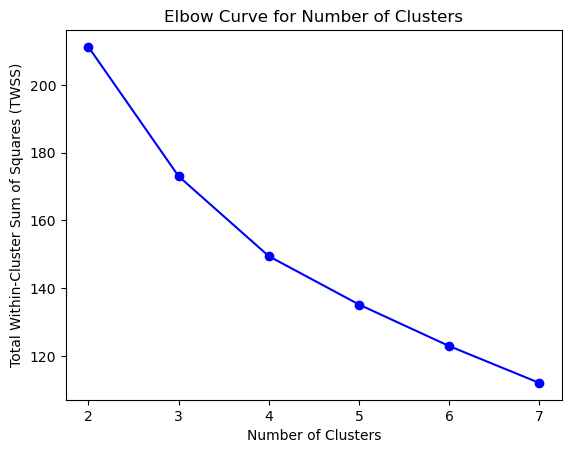

In [49]:
#plot the elbow curve
plt.plot(k, TWSS, 'ro-',color='blue')
plt.xlabel("Number of Clusters")
plt.ylabel("Total Within-Cluster Sum of Squares (TWSS)")
plt.title("Elbow Curve for Number of Clusters")
plt.show()